In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.models import load_model
%matplotlib inline

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [ ]:
IMG_SIZE =(224,224)
BATCH_SIZE = 32
EPOCHS=10
OUTPUT_SHAPE=4

ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/potato',
                                                             shuffle=True,
                                                             batch_size=BATCH_SIZE,
                                                             image_size=(IMG_SIZE))

Found 2067 files belonging to 3 classes.


In [ ]:
print(ds.class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
def create_data_batch(dataset,train_size = 0.8,test_size=0.1,val_size=0.1,shuffle=True,shuffle_size=1000):
    data_size = len(dataset)

    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=6)

    train_size = int(data_size*train_size)
    val_size = int(data_size*test_size)
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)

    return train_ds,test_ds,val_ds

In [ ]:
train_ds,test_ds,val_ds = create_data_batch(ds)

In [ ]:
len(train_ds),len(test_ds),len(val_ds)

(52, 7, 6)

In [ ]:
class_name = ds.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

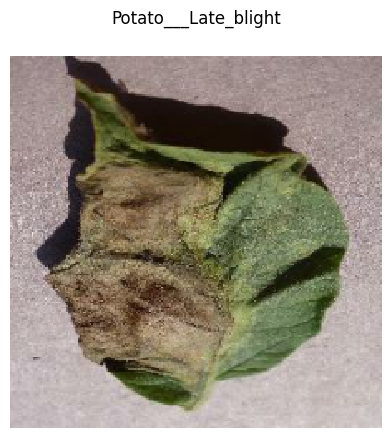

In [ ]:
for image,label in ds.take(1):
  for i in range(1):
    plt.matshow(image[i].numpy().astype('uint8'))
    plt.title(class_name[label[i]])
    plt.axis("off")

In [ ]:
rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
    tf.keras.layers.experimental.preprocessing.Resizing(224,224)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
INPUT_SHAPE=(BATCH_SIZE,224,224,3)

In [ ]:
model = tf.keras.Sequential([

  rescale,
  data_augmentation,
  tf.keras.layers.Conv2D(45,(3,3),activation = "relu",input_shape = (INPUT_SHAPE)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(50,(3,3),activation = "relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(50,(3,3),activation = "relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),

  #DENSE LAYER
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(OUTPUT_SHAPE,activation="softmax")

])
model.build(INPUT_SHAPE)

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

callback=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=2)

In [ ]:
history = model.fit(train_ds,epochs=20,validation_data=val_ds,batch_size=BATCH_SIZE,callbacks=[callback])

Epoch 1/20
52/52 [==============================] - 295s 5s/step - loss: 0.7497 - accuracy: 0.7002 - val_loss: 0.4657 - val_accuracy: 0.8385
Epoch 2/20
52/52 [==============================] - 279s 5s/step - loss: 0.3898 - accuracy: 0.8571 - val_loss: 0.3000 - val_accuracy: 0.8594
Epoch 3/20
52/52 [==============================] - 273s 5s/step - loss: 0.2642 - accuracy: 0.8910 - val_loss: 0.6944 - val_accuracy: 0.7240
Epoch 4/20
52/52 [==============================] - 275s 5s/step - loss: 0.2463 - accuracy: 0.9085 - val_loss: 0.2348 - val_accuracy: 0.8906
Epoch 5/20
52/52 [==============================] - 271s 5s/step - loss: 0.1585 - accuracy: 0.9437 - val_loss: 0.1925 - val_accuracy: 0.9271
Epoch 6/20
52/52 [==============================] - 278s 5s/step - loss: 0.1378 - accuracy: 0.9485 - val_loss: 0.2271 - val_accuracy: 0.9115
Epoch 7/20
52/52 [==============================] - 271s 5s/step - loss: 0.1931 - accuracy: 0.9194 - val_loss: 0.2951 - val_accuracy: 0.8490
Epoch 8/20
52

In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 10s 1s/step - loss: 0.2015 - accuracy: 0.9107


[0.2014828622341156, 0.9107142686843872]

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 45)      1260      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 45)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 50)      20300     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 50)       0         
 2D)                                                  

In [ ]:
model.save("/content/drive/MyDrive/Agricultural-crops.h5")

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Agricultural-crops.h5")

In [ ]:
img_path = '/content/drive/MyDrive/Agricultural-crops/OIP.jpeg'  # Change the path to your image
img = image.load_img(img_path, target_size=(224,224))  # Set the target size expected by your model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

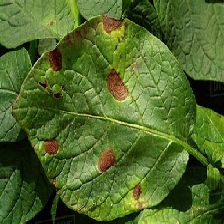

In [ ]:
img

In [ ]:
predictions = loaded_model.predict(img_array)

1/1 [==============================] - 1s 952ms/step


In [ ]:
# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_class_label = class_name[predicted_class_index]

In [ ]:
predicted_class_index

0

In [ ]:
predicted_class_label

'Potato___Early_blight'